<a href="https://colab.research.google.com/github/LeandroCoelhos/exemplos_modelos/blob/main/Classifica%C3%A7%C3%A3o_FOR_Varios_Modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns 
from time import time

from sklearn.linear_model import LogisticRegression, Perceptron, PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomTreesEmbedding, ExtraTreesClassifier, RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.dummy import DummyClassifier
 
from sklearn.model_selection import cross_validate, RepeatedStratifiedKFold 
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

In [ ]:

# Importing the dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/LeandroCoelhos/datasets/main/Social%20Network%20Ads/Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
Y = dataset.iloc[:, 4].values
dataset.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


# Nova seção

In [ ]:
X

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


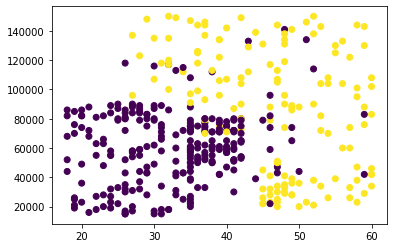

In [ ]:
plt.scatter(x = dataset['Age'], y = dataset['EstimatedSalary'], c = dataset['Purchased'])
plt.show()

In [ ]:

# Feature Scaling
#Normalização dos dados
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
 
#Nomes dos classificadores considerados
nome = [
    '5-Vizinhos Mais Próximos',
    '15-Vizinhos Mais Próximos',
    '25-Vizinhos Mais Próximos',
    '35-Vizinhos Mais Próximos',
    'Árvore de Decisão',
    'Regressão Logística', 
    'Análise Discriminante Linear',
    'Análise Discriminante Quadrática',
    'Bagging de Árvores',
    'Bagging de Regressão Logística',
    'Floresta Aleatória',
    'AdaBoost',
    'Extra Árvores',
    'Classificador Passivo Agressivo',
    'Gradient Boosting',
    'Gaussian Naive Bayes', 
    'Support Vector Machine (Linear)',
    'Support Vector Machine (RBF)',
    'Support Vector Machine (Poli.G3)',
    'Support Vector Machine (Sigmoid)',
    'Rede Neural Perceptron',
    'Rede Neural MLP (10)',
    'Rede Neural MLP (10,10)',
    'Rede Neural MLP (100)']

#Classificadores considerados
classifiers = [
    KNeighborsClassifier(n_neighbors = 5),
    KNeighborsClassifier(n_neighbors = 15),
    KNeighborsClassifier(n_neighbors = 25),
    KNeighborsClassifier(n_neighbors = 35),
    DecisionTreeClassifier(),
    LogisticRegression(), 
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    BaggingClassifier(),
    BaggingClassifier(base_estimator = LogisticRegression()),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    ExtraTreesClassifier(),
    PassiveAggressiveClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(), 
    SVC(kernel = 'linear'),
    SVC(kernel = 'rbf'),
    SVC(kernel = 'poly'),
    SVC(kernel = 'sigmoid'),
    Perceptron(),
    MLPClassifier(hidden_layer_sizes=(10), max_iter = 1000),
    MLPClassifier(hidden_layer_sizes=(10,10), max_iter = 1000),
    MLPClassifier(hidden_layer_sizes=(100), max_iter = 1000)]

In [ ]:
validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 10)
resultados = pd.DataFrame()

i = 1
t0 = time()

for i, modelo in enumerate(classifiers):
    print('Ajustando o modelo', nome[i])
    t = time()
    abc = cross_validate(modelo, X, Y, cv = validacao, scoring = ['accuracy', 'roc_auc', 'f1'])
    print('Tempo de Execução:', round(time() - t, 2), 'segundos\n')
    acc = abc['test_accuracy'].mean()
    auc = abc['test_roc_auc'].mean()
    f1s = abc['test_f1'].mean()

    dic = {'Acurácia': [acc], 'Área ROC': [auc], 'F1-Score': [f1s]}
    aux = pd.DataFrame(dic, index = [nome[i]])
    resultados = pd.concat([resultados, aux])

print('Tempo de Total Execução:', round(time() - t0, 2), 'segundos\n')

Ajustando o modelo 5-Vizinhos Mais Próximos
Tempo de Execução: 0.96 segundos

Ajustando o modelo 15-Vizinhos Mais Próximos
Tempo de Execução: 1.04 segundos

Ajustando o modelo 25-Vizinhos Mais Próximos
Tempo de Execução: 0.81 segundos

Ajustando o modelo 35-Vizinhos Mais Próximos
Tempo de Execução: 0.48 segundos

Ajustando o modelo Árvore de Decisão
Tempo de Execução: 0.27 segundos

Ajustando o modelo Regressão Logística
Tempo de Execução: 0.45 segundos

Ajustando o modelo Análise Discriminante Linear
Tempo de Execução: 0.32 segundos

Ajustando o modelo Análise Discriminante Quadrática
Tempo de Execução: 0.28 segundos

Ajustando o modelo Bagging de Árvores
Tempo de Execução: 1.94 segundos

Ajustando o modelo Bagging de Regressão Logística
Tempo de Execução: 3.87 segundos

Ajustando o modelo Floresta Aleatória
Tempo de Execução: 14.16 segundos

Ajustando o modelo AdaBoost
Tempo de Execução: 7.67 segundos

Ajustando o modelo Extra Árvores
Tempo de Execução: 10.65 segundos

Ajustando o mo

In [ ]:
resultados

,Acurácia,Área ROC,F1-Score
5-Vizinhos Mais Próximos,0.89375,0.933984,0.851800
15-Vizinhos Mais Próximos,0.90600,0.950853,0.872658
25-Vizinhos Mais Próximos,0.90625,0.957741,0.871243
35-Vizinhos Mais Próximos,0.89950,0.956663,0.858086
Árvore de Decisão,0.86325,0.851205,0.807317
Regressão Logística,0.84225,0.925824,0.756955
Análise Discriminante Linear,0.84625,0.923723,0.761441
Análise Discriminante Quadrática,0.89975,0.954845,0.860489
Bagging de Árvores,0.87800,0.924905,0.830449
Bagging de Regressão Logística,0.84175,0.924768,0.757398


In [ ]:
resultados = resultados.sort_values(by='Área ROC', ascending = False)
print(resultados) 

                                  Acurácia  Área ROC  F1-Score
25-Vizinhos Mais Próximos          0.90625  0.957741  0.871243
Rede Neural MLP (10,10)            0.90700  0.957189  0.872585
Rede Neural MLP (100)              0.90675  0.956808  0.871540
35-Vizinhos Mais Próximos          0.89950  0.956663  0.858086
Análise Discriminante Quadrática   0.89975  0.954845  0.860489
Rede Neural MLP (10)               0.90225  0.954734  0.865440
Support Vector Machine (RBF)       0.90975  0.952761  0.879061
15-Vizinhos Mais Próximos          0.90600  0.950853  0.872658
Gaussian Naive Bayes               0.88850  0.949226  0.837830
Gradient Boosting                  0.89175  0.947316  0.849921
AdaBoost                           0.88375  0.942399  0.828947
Floresta Aleatória                 0.88825  0.938643  0.846173
Support Vector Machine (Poli.G3)   0.84700  0.934881  0.745111
5-Vizinhos Mais Próximos           0.89375  0.933984  0.851800
Regressão Logística                0.84225  0.925824  0

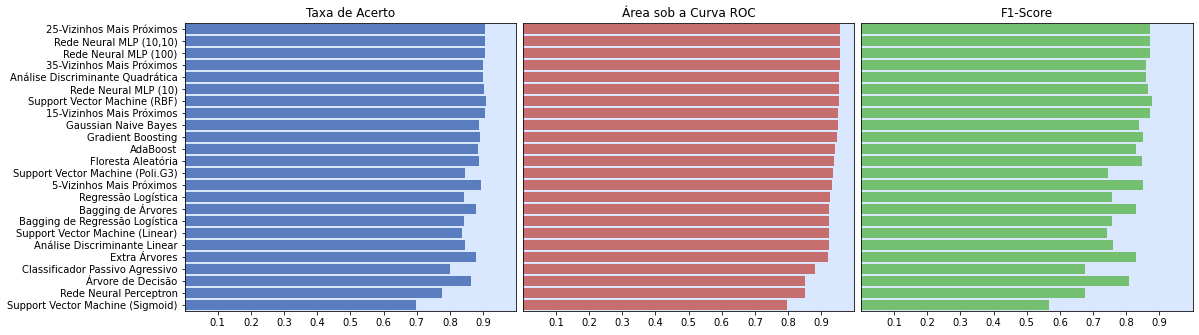

In [ ]:
#Gráficos relevantes
sns.set_color_codes("muted")
bgcolor = '#d9e7ff'
ticagem = [.1, .2, .3, .4, 0.5, .6,.7,.8,.9]
figura = plt.figure(figsize=(20,5)) 
figura.subplots_adjust(left=0.2, bottom=0.1, right=0.9, top=0.9, wspace=0.02, hspace=1)

plt.subplot(1, 3, 1)
plt.title('Taxa de Acerto')
acc = sns.barplot(x = resultados.iloc[:,0], y = resultados.index.values, color='b')
acc.axes.set_xlim([0, 1])
acc.xaxis.set_ticks(ticagem)
acc.set_facecolor(bgcolor)
plt.xlabel('')

plt.subplot(1, 3, 2)
plt.title('Área sob a Curva ROC')
auc = sns.barplot(x = resultados.iloc[:,1], y = resultados.index.values, color='r')
auc.axes.get_yaxis().set_visible(False)
auc.axes.set_xlim([0, 1])
auc.xaxis.set_ticks(ticagem)
auc.set_facecolor(bgcolor)
plt.xlabel('')
plt.ylabel('')

plt.subplot(1, 3, 3)
plt.title('F1-Score')
f1 = sns.barplot(x = resultados.iloc[:,2], y = resultados.index.values, color='g')
f1.axes.set_xlim([0, 1])
f1.xaxis.set_ticks(ticagem)
f1.axes.get_yaxis().set_visible(False)
f1.set_facecolor(bgcolor)
plt.xlabel('')
plt.ylabel('') 

plt.show()
figura.savefig('medidas.pdf')




Plotando o gráfico 1/24: 5-Vizinhos Mais Próximos

Plotando o gráfico 2/24: 15-Vizinhos Mais Próximos

Plotando o gráfico 3/24: 25-Vizinhos Mais Próximos

Plotando o gráfico 4/24: 35-Vizinhos Mais Próximos

Plotando o gráfico 5/24: Árvore de Decisão

Plotando o gráfico 6/24: Regressão Logística

Plotando o gráfico 7/24: Análise Discriminante Linear

Plotando o gráfico 8/24: Análise Discriminante Quadrática

Plotando o gráfico 9/24: Bagging de Árvores

Plotando o gráfico 10/24: Bagging de Regressão Logística

Plotando o gráfico 11/24: Floresta Aleatória

Plotando o gráfico 12/24: AdaBoost

Plotando o gráfico 13/24: Extra Árvores

Plotando o gráfico 14/24: Classificador Passivo Agressivo

Plotando o gráfico 15/24: Gradient Boosting

Plotando o gráfico 16/24: Gaussian Naive Bayes

Plotando o gráfico 17/24: Support Vector Machine (Linear)

Plotando o gráfico 18/24: Support Vector Machine (RBF)

Plotando o gráfico 19/24: Support Vector Machine (Poli.G3)

Plotando o gráfico 20/24: Support V

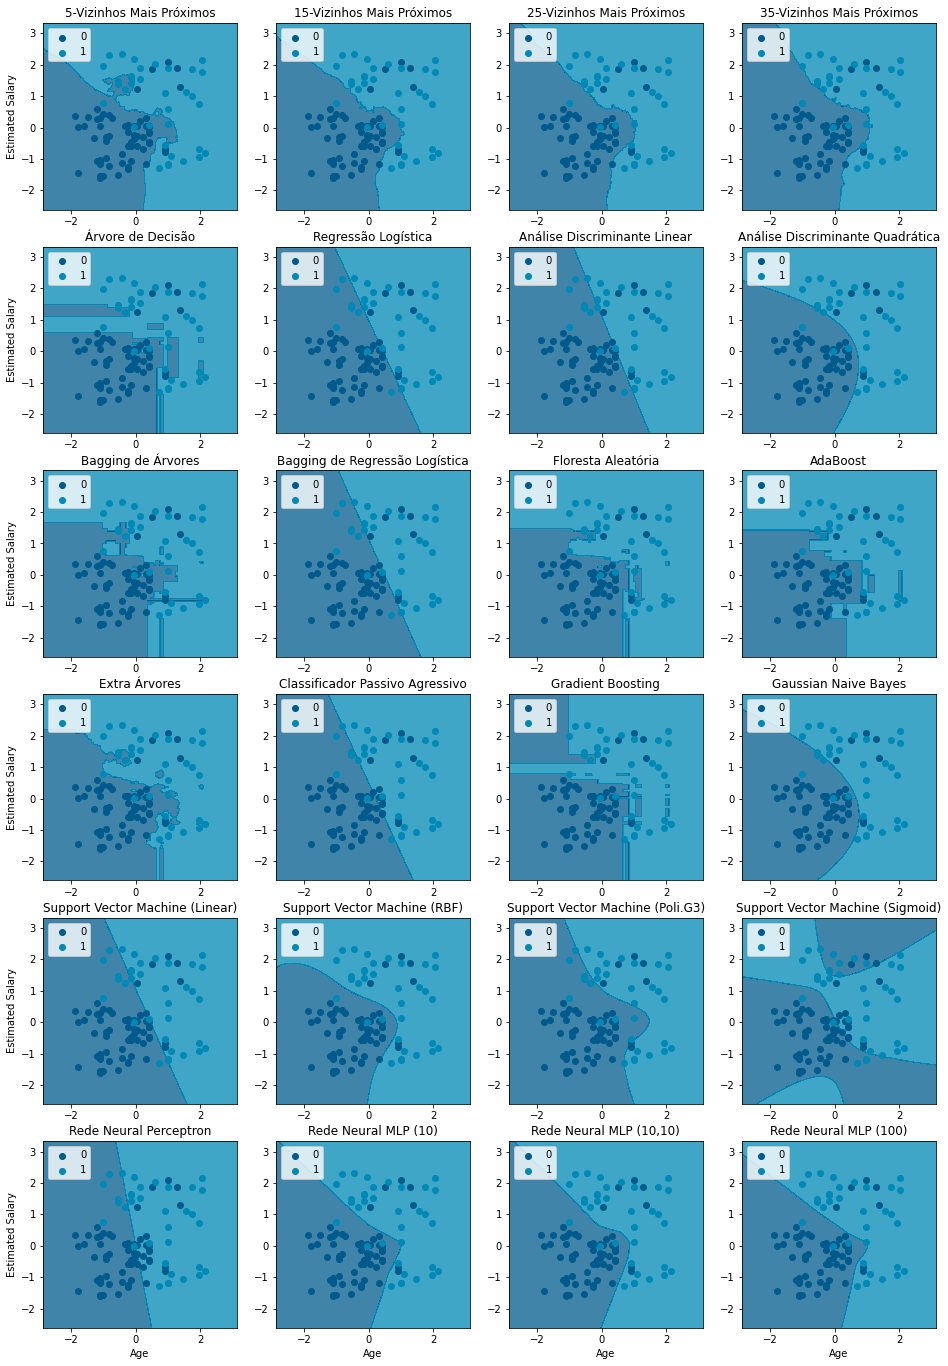

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
#Método HOLDOUT
Xtreino, Xteste, ytreino, yteste = train_test_split(X, Y, test_size = 0.25 )       

# Plots das regioes de classificacao de cada método       
from matplotlib.colors import ListedColormap       
plt.figure(figsize=(16,24))

for k in range(len(classifiers)):
    print('\nPlotando o gráfico ' + str(k+1) + '/' + str(len(classifiers)) + ': ' + nome[k])
    #Arranjo do gráfico, o k+1 determina a posição do grafico no grid
    plt.subplot(6, 4, k+1) 
    #O Classificador a ser usado
    clf = classifiers[k]
    #Faz um novo treinamento do algoritimo
    clf.fit(Xtreino, ytreino)
    #Intervalo de "folga" do gráfico, para não ficar nos extremos
    X1, X2 = np.meshgrid(np.arange(start = Xteste[:, 0].min() - 1, stop = Xteste[:, 0].max() + 1, step = 0.01),
                         np.arange(start = Xteste[:, 1].min() - 1, stop = Xteste[:, 1].max() + 1, step = 0.01))
    #Faz o ploto efetivo do grid
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('#005b8c', '#0089b6')))
    #indica os limites do grafico nos máximos e mínimos valores
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    #For para colorir o gráfico
    for i, j in enumerate(np.unique(yteste)):
        plt.scatter(Xteste[yteste == j, 0], Xteste[yteste == j, 1],
                    c = ListedColormap(('#005b8c', '#0089b6'))(i), label = j)
    #Título do Gráfico
    plt.title(nome[k])
    #For para colocar "AGE" como título no eixo x dos ultimos graficos
    if k >= 20 :
        plt.xlabel('Age')
    #For para colocar "Estimate Salary" como legenda do eixo Y
    if k in range(0, 21, 4):
        plt.ylabel('Estimated Salary')
    plt.legend()
#ajustes automáticos
plt.savefig("regioes.pdf", bbox_inches = 'tight')
plt.show() 